# Grid notation of permutations

## Libraries

In [1]:
import random
import sympy
sympy.init_printing()

# import plotly.graph_objects as go

# ----- Debugger -----
# from IPython.core.debugger import Pdb; Pdb().set_trace()
# --------------------

In [2]:
import sys
sys.path.append("../modules")

import Permutations as pm
from Grid import *

## Sequence of reduction

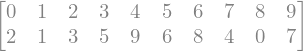

[[2, 3, 5, 6, 8, 0], [1], [9, 7, 4]], 3
+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 1 |   |
+---+---+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+---+---+---+
|   |   |   | 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   | 1 |
+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |   |   |   |
+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+


In [3]:
N = 10
img = list(range(N)); random.shuffle(img)

prm = pm.Permutation(img)
display(sympy.Matrix(prm.two_line()))  # , prm.image, prm.size)
cd = pm.cycle_decomp(prm); print("{}, {}".format(cd, len(cd)))

G = Grid(prm)
G.show()

In [4]:
grid = G.copy()
nums = []

while grid.size > 1:
    new = grid.transform()
    if type(new) == dict:
        nums += [new["num"]]
        grid = new["grid"]
    else:
        grid = new
    grid.show()
    print("\n↓ {}\n".format(nums)) if grid.size > 1 else "END"
else:
    nums += [grid.matrix[0][0]]
    print("numbers:{}, total:{}".format(nums, sum(nums)))

+---+---+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | 1 |   |
+---+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 1 |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   | 1 |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+

↓ []

+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |   |
+---+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |